In [69]:
# El movimiento de proyectil
# r''= (1/m)*(w − fr)
# r'= v, v' = a, a =1m(w − fr).
# el sistema resultante es:
# r'= v 
# v'= (1/m)*(w − fr) de forma vectorial
# fr = -c*(vx^2 + vy^2)*(v)unitario para cada eje
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# Definimos los parámetros del problema
m = 1 # masa del proyectil en kg
g = 9.81 # aceleración de la gravedad en m/s^2
c = 0.15 # coeficiente de fricción en kg/m
u0 = 0.0 # velocidad inicial horizontal en m/s
v0 = 300 # velocidad inicial vertical en m/s
x0 = 0 # posición inicial horizontal en m
y0 = 0 # posición inicial vertical en m
a = 0 # tiempo inicial en s
b = 10 # tiempo final en s
h = 0.01 # tamaño del paso en s

In [71]:
# Definimos las funciones del sistema
def f1(t, x, y, u, v):
    return u

def f2(t, x, y, u, v):
    return v

def f3(t, x, y, u, v):
    return -(c/m)*(u/np.sqrt(u**2 + v**2))*(u**2 + v**2)

def f4(t, x, y, u, v):
    return -g - (c/m)*(v/np.sqrt(u**2 + v**2))*(u**2 + v**2)


In [72]:
def RK4_ecdif(a, b, h, inicial):
    '''
    Metodo de Runge-Kutta de orden 4
    Para movimiento vertical
    :param a: extremo inicial del intervalo analizado
    :param b: extremo final del intervalo analizado
    :param h: tamaño de paso
    :param w0: valor inicial
    :return:
    x,y: vector con los valores de las variables calculadas (posiciones)
    u,v: vector con los valores de las variables calculadas (velocidades: u en x, v en y)
    '''
    N = int(b/h) # número de pasos
    t = np.linspace(a, b, N+1) # arreglo de tiempos
    x = np.zeros(N+1) # arreglo de posiciones horizontales
    y = np.zeros(N+1) # arreglo de posiciones verticales
    u = np.zeros(N+1) # arreglo de velocidades horizontales
    v = np.zeros(N+1) # arreglo de velocidades verticales
    w0 = inicial
    x[0] = w0[0]
    y[0] = w0[1]
    u[0] = w0[2]
    v[0] = w0[3]
    for n in range(N):
        k1x = h*f1(t[n], x[n], y[n], u[n], v[n])
        k1y = h*f2(t[n], x[n], y[n], u[n], v[n])
        k1u = h*f3(t[n], x[n], y[n], u[n], v[n])
        k1v = h*f4(t[n], x[n], y[n], u[n], v[n])

        k2x = h*f1(t[n] + h/2, x[n] + k1x/2, y[n] + k1y/2, u[n] + k1u/2, v[n] + k1v/2)
        k2y = h*f2(t[n] + h/2, x[n] + k1x/2, y[n] + k1y/2, u[n] + k1u/2, v[n] + k1v/2)
        k2u = h*f3(t[n] + h/2, x[n] + k1x/2, y[n] + k1y/2, u[n] + k1u/2, v[n] + k1v/2)
        k2v = h*f4(t[n] + h/2, x[n] + k1x/2, y[n] + k1y/2, u[n] + k1u/2, v[n] + k1v/2)

        k3x = h*f1(t[n] + h/2, x[n] + k2x/2, y[n] + k2y/2, u[n] + k2u/2, v[n] + k2v/2)
        k3y = h*f2(t[n] + h/2, x[n] + k2x/2, y[n] + k2y/2, u[n] + k2u/2, v[n] + k2v/2)
        k3u = h*f3(t[n] + h/2, x[n] + k2x/2, y[n] + k2y/2, u[n] + k2u/2, v[n] + k2v/2)
        k3v = h*f4(t[n] + h/2, x[n] + k2x/2, y[n] + k2y/2, u[n] + k2u/2, v[n] + k2v/2)

        k4x = h*f1(t[n] + h, x[n] + k3x, y[n] + k3y, u[n] + k3u, v[n] + k3v)
        k4y = h*f2(t[n] + h, x[n] + k3x, y[n] + k3y, u[n] + k3u, v[n] + k3v)
        k4u = h*f3(t[n] + h, x[n] + k3x, y[n] + k3y, u[n] + k3u, v[n] + k3v)
        k4v = h*f4(t[n] + h, x[n] + k3x, y[n] + k3y, u[n] + k3u, v[n] + k3v)

        x[n+1] = x[n] + 1/6*(k1x + 2*k2x + 2*k3x + k4x)
        y[n+1] = y[n] + 1/6*(k1y + 2*k2y + 2*k3y + k4y)
        u[n+1] = u[n] + 1/6*(k1u + 2*k2u + 2*k3u + k4u)
        v[n+1] = v[n] + 1/6*(k1v + 2*k2v + 2*k3v + k4v)
    return x,y,u,v,t

In [73]:
inicial = [x0,y0,u0,v0]
x,y,u,v,t = RK4_ecdif(a, b, h, inicial)

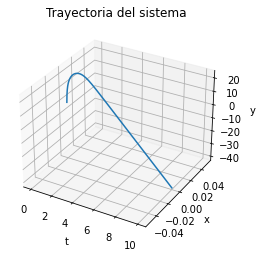

In [74]:
# Graficamos la trayectoria (x(t),y(t),t) del sistema
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(t,x,y)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
ax.set_title('Trayectoria del sistema')
plt.show()

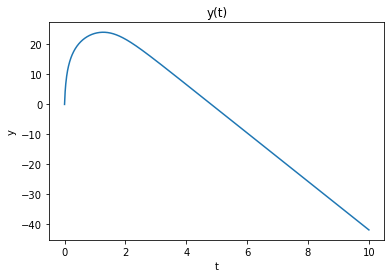

In [75]:
plt.plot(t,y)
plt.title("y(t)")
plt.xlabel("t")
plt.ylabel("y")
plt.show()

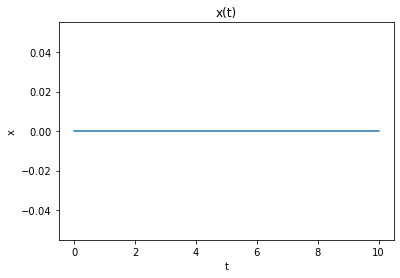

In [76]:
plt.plot(t,x)
plt.title("x(t)")
plt.xlabel("t")
plt.ylabel("x")
plt.show()

In [77]:
#el metodo implicito de punto medio (implicit midpoint)
#r[i+1] = r[i] + h*f((r[i]+r[i+1])/2,(v[i]+v[i+1])/2)
#v[i+1] = v[i] + h*g((r[i]+r[i+1])/2,(v[i]+v[i+1])/2)


In [78]:
def RK4_Mid_point(a, b, h, inicial):
    '''
    Metodo Mid_point
    Para movimiento vertical
    se aproxima x[n+1] por RK4 y se mejora el mismo por Mid-point
    :param a: extremo inicial del intervalo analizado
    :param b: extremo final del intervalo analizado
    :param h: tamaño de paso
    :param w0: valor inicial
    :return:
    x,y: vector con los valores de las variables calculadas (posiciones)
    u,v: vector con los valores de las variables calculadas (velocidades: u en x, v en y)
    '''
    N = int(b/h) # número de pasos
    t = np.linspace(a, b, N+1) # arreglo de tiempos
    x = np.zeros(N+1) # arreglo de posiciones horizontales
    y = np.zeros(N+1) # arreglo de posiciones verticales
    u = np.zeros(N+1) # arreglo de velocidades horizontales
    v = np.zeros(N+1) # arreglo de velocidades verticales
    w0 = inicial
    x[0] = w0[0]
    y[0] = w0[1]
    u[0] = w0[2]
    v[0] = w0[3]
    for n in range(N):
        k1x = h*f1(t[n], x[n], y[n], u[n], v[n])
        k1y = h*f2(t[n], x[n], y[n], u[n], v[n])
        k1u = h*f3(t[n], x[n], y[n], u[n], v[n])
        k1v = h*f4(t[n], x[n], y[n], u[n], v[n])

        k2x = h*f1(t[n] + h/2, x[n] + k1x/2, y[n] + k1y/2, u[n] + k1u/2, v[n] + k1v/2)
        k2y = h*f2(t[n] + h/2, x[n] + k1x/2, y[n] + k1y/2, u[n] + k1u/2, v[n] + k1v/2)
        k2u = h*f3(t[n] + h/2, x[n] + k1x/2, y[n] + k1y/2, u[n] + k1u/2, v[n] + k1v/2)
        k2v = h*f4(t[n] + h/2, x[n] + k1x/2, y[n] + k1y/2, u[n] + k1u/2, v[n] + k1v/2)

        k3x = h*f1(t[n] + h/2, x[n] + k2x/2, y[n] + k2y/2, u[n] + k2u/2, v[n] + k2v/2)
        k3y = h*f2(t[n] + h/2, x[n] + k2x/2, y[n] + k2y/2, u[n] + k2u/2, v[n] + k2v/2)
        k3u = h*f3(t[n] + h/2, x[n] + k2x/2, y[n] + k2y/2, u[n] + k2u/2, v[n] + k2v/2)
        k3v = h*f4(t[n] + h/2, x[n] + k2x/2, y[n] + k2y/2, u[n] + k2u/2, v[n] + k2v/2)

        k4x = h*f1(t[n] + h, x[n] + k3x, y[n] + k3y, u[n] + k3u, v[n] + k3v)
        k4y = h*f2(t[n] + h, x[n] + k3x, y[n] + k3y, u[n] + k3u, v[n] + k3v)
        k4u = h*f3(t[n] + h, x[n] + k3x, y[n] + k3y, u[n] + k3u, v[n] + k3v)
        k4v = h*f4(t[n] + h, x[n] + k3x, y[n] + k3y, u[n] + k3u, v[n] + k3v)

        x[n+1] = x[n] + 1/6*(k1x + 2*k2x + 2*k3x + k4x)
        y[n+1] = y[n] + 1/6*(k1y + 2*k2y + 2*k3y + k4y)
        u[n+1] = u[n] + 1/6*(k1u + 2*k2u + 2*k3u + k4u)
        v[n+1] = v[n] + 1/6*(k1v + 2*k2v + 2*k3v + k4v)
        '''el método implícito de punto medio, se utiliza aqui como corrector de los valores hallados'''
        x[n+1] = x[n] + h*f1((t[n]+t[n+1])/2, (x[n]+x[n+1])/2, (y[n]+y[n+1])/2, (u[n]+u[n+1])/2, (v[n]+v[n+1])/2)
        y[n+1] = y[n] + h*f2((t[n]+t[n+1])/2, (x[n]+x[n+1])/2, (y[n]+y[n+1])/2, (u[n]+u[n+1])/2, (v[n]+v[n+1])/2)
        u[n+1] = u[n] + h*f3((t[n]+t[n+1])/2, (x[n]+x[n+1])/2, (y[n]+y[n+1])/2, (u[n]+u[n+1])/2, (v[n]+v[n+1])/2)
        v[n+1] = v[n] + h*f4((t[n]+t[n+1])/2, (x[n]+x[n+1])/2, (y[n]+y[n+1])/2, (u[n]+u[n+1])/2, (v[n]+v[n+1])/2)
    return x,y,u,v,t

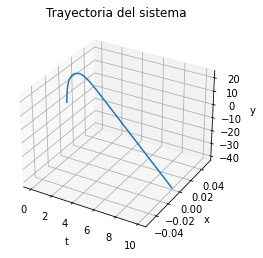

In [79]:
inicial = [x0,y0,u0,v0]
x1,y1,u1,v1,t1 = RK4_Mid_point(a, b, h, inicial)
# Graficamos la trayectoria (x(t),y(t),t) del sistema
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(t1,x1,y1)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
ax.set_title('Trayectoria del sistema')
plt.show()

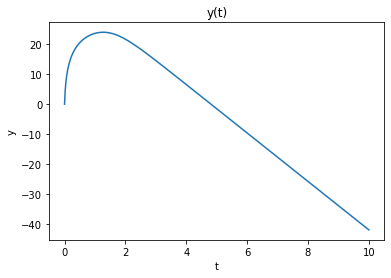

In [81]:
plt.plot(t1,y1)
plt.title("y(t)")
plt.xlabel("t")
plt.ylabel("y")
plt.show()